**Topic modelling for news articles**

In [2]:
#%pip install gensim
#%pip install pyLDAvis
#%pip install --upgrade numexpr
#%pip install --upgrade bottleneck
#%pip install openpyxl
import pandas as pd
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel, CoherenceModel
import pyLDAvis.gensim_models
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('wordnet')


Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alicjadorobis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alicjadorobis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
#load the data into a dataframe
df = pd.read_excel('ride_sharing_data_full.xlsx')

display(df)

#removing line spacing and 'at' symbols
df = df.replace('\n',' ', regex=True)
df = df.replace('\xa0',' ', regex=True)

# store text in a new list
article_text = df['Text'].to_list()

# check the text 
article_text


ID                                               Text  \
0      1  \n On-demand transit projects that started bef...   
1      2  \nAn autonomous vehicle, also known as a drive...   
2      3  \nMore than 50 organizations agree to make sha...   
3      4  \n Integrating on-demand microtransit options ...   
4      5  \nBringing\n items to the end consumer is as o...   
..   ...                                                ...   
754  755  \nFollowing its US$8bn buy-out by Samsung, wil...   
755  756  \nHONG KONG (Reuters) – Apple chief executive ...   
756  757  \nThe ebb and flow of a city may feel entirely...   
757  758  \nAlain de Muyser general secretary Benelux. C...   
758  759  \nby Matt Piotrowski\n \nVehicle miles travele...   

                                                   URL  \
0    https://www.sharedmobility.news/us-transit-lea...   
1    https://www.sharedmobility.news/autonomous-veh...   
2    https://www.sharedmobility.news/new-shared-mob...   
3    https://www.sharedmobility.news/the-role-of-mi...   
4    https://www.sharedmobility.news/now-centuries-...   
..                                                 ...   
754  https://www.sharedmobility.news/from-connected...   
755              https://www.sharedmobility.news/1327/   
756  https://www.sharedmobility.news/this-formula-e...   
757            https://www.sharedmobility.news/2409-2/   
758            https://www.sharedmobility.news/2385-2/   

                                         Article Title  
0    US: Transit leaders praise innovative on-deman...  
1    Autonomous vehicles: the future of transportation  
2    New shared mobility network announces visionar...  
3    The role of microtransit for better equity and...  
4    Now centuries old, last-mile delivery looks to...  
..                                                 ...  
754               From connected car to connected life  
755  Apple CEO Tim Cook visited a $1 billion bike-s...  
756  This formula explains why NYC is great for rid...  
757             Italy's car sharing drives its economy  
758             Vehicle Miles Traveled And Ridesharing  

[759 rows x 4 columns]

['  On-demand transit projects that started before COVID-19 have led to robust ridership and speak to innovation that the public will need in a post-COVID world, according to experts during an event last week.  By Skip Descant   On-demand transit projects that started before COVID-19 have led to robust ridership and speak to innovation that the public will need in a post-COVID world, according to experts during an event last week.  “From the start of the pandemic, the public transportation industry pivoted to meet a new world of never-before-seen challenges,” said Paul Skoutelas, president and CEO of the American Public Transportation Association (APTA) during a July 28 press briefing. “Innovation became survival.” APTA organized the briefing to underscore transit innovation during the pandemic and to present a new report titled “Mobility Innovation: The Case for Federal Investment and Support.” The case studies in the report explore how various transit systems have structured, launche

In [63]:
import string
from nltk.tokenize import word_tokenize
#custom stopwords added after viewing the initial visualisation
custom_stopwords = ['also', 'said', 'one', 'per', 'get', 'could', 'would', 'ev', 'u', 'make', 'av', 'It', 'The', 'This', 'say', 'In', 'I', 'http','year']
def preprocess(text):
    stop_words = set(stopwords.words('english')).union(set(custom_stopwords or []))  # adding the custom stopwords and english
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    text = text.translate(str.maketrans('', '', string.punctuation)) 
    
    return [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word.isalpha()]   #substitute tokens for text.lower().split() if nto working


processed_texts = [preprocess(text) for text in article_text]

In [73]:
# creating the corpus
dictionary = corpora.Dictionary(processed_texts)
corpus = [dictionary.doc2bow(text) for text in processed_texts]
corpus 

[[(0, 2),
  (1, 2),
  (2, 3),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 2),
  (7, 1),
  (8, 1),
  (9, 2),
  (10, 2),
  (11, 1),
  (12, 2),
  (13, 1),
  (14, 1),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 2),
  (22, 1),
  (23, 1),
  (24, 2),
  (25, 1),
  (26, 2),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 4),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 2),
  (46, 1),
  (47, 2),
  (48, 1),
  (49, 2),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 2),
  (59, 2),
  (60, 1),
  (61, 2),
  (62, 1),
  (63, 2),
  (64, 1),
  (65, 1),
  (66, 2),
  (67, 1),
  (68, 1),
  (69, 3),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 3),
  (77, 2),
  (78, 1),
  (79, 3),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1)

In [31]:
from gensim.models import CoherenceModel

# the higher the coherence score the better choice of the number of topics
coherence__perplexity_list = []

for i in range(1,40):
    lda_model = LdaModel(corpus, num_topics=i, id2word=dictionary, passes=15)

    coherence_model = CoherenceModel(model=lda_model, texts=processed_texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence() #coherence
    perplexity = lda_model.log_perplexity(corpus) #perplexity

    coherence__perplexity_list.append((i, coherence_score, perplexity)) #adding to a list
    print(f"Number of Topics: {i}, Coherence Score: {coherence_score}, Perplexity: {perplexity}")



Number of Topics: 1, Coherence Score: 0.2614579573235585, Perplexity: -8.073963965081768
Number of Topics: 2, Coherence Score: 0.3073841438907725, Perplexity: -8.024145412323339
Number of Topics: 3, Coherence Score: 0.3092896776867459, Perplexity: -8.03942836038024
Number of Topics: 4, Coherence Score: 0.3389805106140678, Perplexity: -8.02118718905222
Number of Topics: 5, Coherence Score: 0.3223028835046137, Perplexity: -8.037286729720007
Number of Topics: 6, Coherence Score: 0.31391171998716966, Perplexity: -8.054418066304185
Number of Topics: 7, Coherence Score: 0.3458944546557309, Perplexity: -8.03252467476815
Number of Topics: 8, Coherence Score: 0.32226477083575505, Perplexity: -8.043850235635409
Number of Topics: 9, Coherence Score: 0.3536718162055041, Perplexity: -8.051604682793776
Number of Topics: 10, Coherence Score: 0.33169140463495456, Perplexity: -8.058362927548227
Number of Topics: 11, Coherence Score: 0.33507994674579383, Perplexity: -8.052595182686623
Number of Topics: 

In [32]:
score_result_df = pd.DataFrame(coherence__perplexity_list, columns=['Num_Topics', 'Coherence_Score', 'Perplexity'])
display(score_result_df)
score_result_df.to_csv('Coherence_perplexity_article.csv')

Num_Topics  Coherence_Score  Perplexity
0            1         0.261458   -8.073964
1            2         0.307384   -8.024145
2            3         0.309290   -8.039428
3            4         0.338981   -8.021187
4            5         0.322303   -8.037287
5            6         0.313912   -8.054418
6            7         0.345894   -8.032525
7            8         0.322265   -8.043850
8            9         0.353672   -8.051605
9           10         0.331691   -8.058363
10          11         0.335080   -8.052595
11          12         0.369129   -8.058553
12          13         0.319968   -8.078324
13          14         0.337695   -8.072486
14          15         0.339173   -8.067201
15          16         0.333333   -8.082926
16          17         0.337804   -8.071005
17          18         0.319131   -8.092751
18          19         0.362704   -8.080376
19          20         0.347374   -8.111219
20          21         0.349285   -8.114539
21          22         0.363276   -8.119463
22          23         0.343993   -8.153724
23          24         0.320102   -8.163224
24          25         0.368542   -8.187879
25          26         0.349334   -8.184800
26          27         0.345999   -8.211600
27          28         0.348079   -8.222103
28          29         0.351971   -8.242864
29          30         0.349122   -8.271291
30          31         0.326194   -8.252507
31          32         0.349337   -8.303947
32          33         0.369814   -8.304786
33          34         0.356069   -8.318359
34          35         0.334262   -8.330147
35          36         0.333330   -8.347775
36          37         0.354100   -8.366513
37          38         0.340116   -8.357823
38          39         0.343768   -8.427450

In [71]:
# reading the csv
df_coherence_perplexity = pd.read_csv('Coherence_perplexity_article.csv')
display(df_coherence_perplexity)

Unnamed: 0  Num_Topics  Coherence_Score  Perplexity
0            0           1         0.261458   -8.073964
1            1           2         0.307384   -8.024145
2            2           3         0.309290   -8.039428
3            3           4         0.338981   -8.021187
4            4           5         0.322303   -8.037287
5            5           6         0.313912   -8.054418
6            6           7         0.345894   -8.032525
7            7           8         0.322265   -8.043850
8            8           9         0.353672   -8.051605
9            9          10         0.331691   -8.058363
10          10          11         0.335080   -8.052595
11          11          12         0.369129   -8.058553
12          12          13         0.319968   -8.078324
13          13          14         0.337695   -8.072486
14          14          15         0.339173   -8.067201
15          15          16         0.333333   -8.082926
16          16          17         0.337804   -8.071005
17          17          18         0.319131   -8.092751
18          18          19         0.362704   -8.080376
19          19          20         0.347374   -8.111219
20          20          21         0.349285   -8.114539
21          21          22         0.363276   -8.119463
22          22          23         0.343993   -8.153724
23          23          24         0.320102   -8.163224
24          24          25         0.368542   -8.187879
25          25          26         0.349334   -8.184800
26          26          27         0.345999   -8.211600
27          27          28         0.348079   -8.222103
28          28          29         0.351971   -8.242864
29          29          30         0.349122   -8.271291
30          30          31         0.326194   -8.252507
31          31          32         0.349337   -8.303947
32          32          33         0.369814   -8.304786
33          33          34         0.356069   -8.318359
34          34          35         0.334262   -8.330147
35          35          36         0.333330   -8.347775
36          36          37         0.354100   -8.366513
37          37          38         0.340116   -8.357823
38          38          39         0.343768   -8.427450

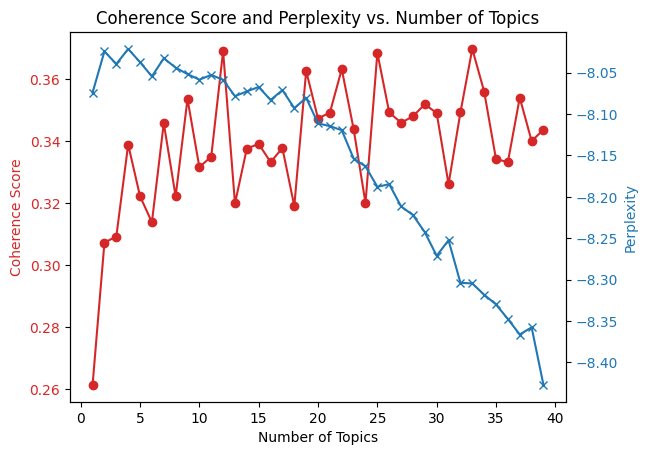

In [72]:

# Plot the results
fig, ax1 = plt.subplots()

# Plot Coherence Score on the first y-axis
color = 'tab:red'
ax1.set_xlabel('Number of Topics')
ax1.set_ylabel('Coherence Score', color=color)
ax1.plot(df_coherence_perplexity['Num_Topics'], df_coherence_perplexity['Coherence_Score'], color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis to plot Perplexity
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Perplexity', color=color)
ax2.plot(df_coherence_perplexity['Num_Topics'], df_coherence_perplexity['Perplexity'], color=color, marker='x')
ax2.tick_params(axis='y', labelcolor=color)

# Title and show the plot
plt.title('Coherence Score and Perplexity vs. Number of Topics')
plt.show()

In [65]:
# Apply LDA to the chose number of topics
num_topics = 18  # Change this depending on how many topics you want
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

In [66]:
# Extract topic distributions for each document 
doc_topics = [lda_model.get_document_topics(bow) for bow in corpus]

In [67]:
# first aticle
print(article_text[0])
# topics distribution within 1st article
print(doc_topics[0])

  On-demand transit projects that started before COVID-19 have led to robust ridership and speak to innovation that the public will need in a post-COVID world, according to experts during an event last week.  By Skip Descant   On-demand transit projects that started before COVID-19 have led to robust ridership and speak to innovation that the public will need in a post-COVID world, according to experts during an event last week.  “From the start of the pandemic, the public transportation industry pivoted to meet a new world of never-before-seen challenges,” said Paul Skoutelas, president and CEO of the American Public Transportation Association (APTA) during a July 28 press briefing. “Innovation became survival.” APTA organized the briefing to underscore transit innovation during the pandemic and to present a new report titled “Mobility Innovation: The Case for Federal Investment and Support.” The case studies in the report explore how various transit systems have structured, launched 

In [55]:
# extract word distribution for each topic
word_topics = lda_model.print_topics()

# word distribution within topics
for idx, topic in word_topics:
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.010*"car" + 0.007*"The" + 0.007*"service" + 0.006*"city" + 0.006*"vehicle" + 0.005*"company" + 0.005*"people" + 0.004*"year" + 0.004*"system" + 0.004*"bike"
Topic: 1 
Words: 0.011*"city" + 0.009*"service" + 0.009*"The" + 0.006*"car" + 0.006*"technology" + 0.005*"vehicle" + 0.005*"people" + 0.004*"smart" + 0.004*"It" + 0.004*"driver"
Topic: 2 
Words: 0.011*"vehicle" + 0.009*"The" + 0.008*"city" + 0.007*"data" + 0.007*"traffic" + 0.005*"car" + 0.005*"service" + 0.005*"technology" + 0.004*"public" + 0.004*"company"
Topic: 3 
Words: 0.009*"vehicle" + 0.008*"car" + 0.008*"The" + 0.006*"company" + 0.006*"service" + 0.005*"new" + 0.005*"mobility" + 0.005*"transportation" + 0.004*"city" + 0.004*"technology"
Topic: 4 
Words: 0.013*"car" + 0.011*"The" + 0.011*"vehicle" + 0.007*"service" + 0.005*"technology" + 0.005*"transportation" + 0.005*"autonomous" + 0.005*"time" + 0.004*"In" + 0.004*"company"
Topic: 5 
Words: 0.009*"The" + 0.008*"car" + 0.006*"technology" + 0.006*"bike" +

In [68]:
# Visualization
import pyLDAvis.gensim_models

In [69]:
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(vis, 'lda_visualization18.html')